(irm-diffusion-chapitre)=
# IRM de diffusion
<table>
  <tr>
    <td align="center">
      <a href="https://github.com/me-pic">
        <img src="https://avatars.githubusercontent.com/u/77584086?v=4?s=100" width="100px;" alt=""/>
        <br /><sub><b>Marie-Eve Picard</b></sub>
      </a>
      <br />
        <a title="Contenu">🤔</a>
    </td>
    <td align="center">
      <a href="https://github.com/pbellec">
        <img src="https://avatars.githubusercontent.com/u/1670887?v=4?s=100" width="100px;" alt=""/>
        <br /><sub><b>Pierre bellec</b></sub>
      </a>
      <br />
        <a title="Contenu">🤔</a>
        <a title="Exercices">⚠️</a>
        <a title="Révision du texte">👀</a>
    </td>
  </tr>
</table>

```{warning}
Ce chapitre est en cours de développement. Il se peut que l'information soit incomplète, ou sujette à changement.
```

## Objectifs du cours

Ce cours a pour but de vous initier aux principes de l'imagerie par résonance magnétique de diffusion (IRMd). L'IRMd est une modalité de neuroimagerie qui nous permet d'étudier les **fibres de matière blanche**. Nous allons donc pouvoir examiner les connexions entre différentes régions, autant interhémisphériques (i.e., fibres de matière blanche voyageant d'un hémisphère à l'autre), qu'intrahémisphériques (i.e., fibres de matière blanche voyageant au sein d'un même hémisphère). Pour vous faire une idée concrète de ce à quoi ressemblent les fibres de matière blanche, vous pouvez regarder cette [vidéo](https://www.youtube.com/watch?v=PazaHElk6wc) présentant des dissections cérébrales, tirée du [cours de neuroanatomie fonctionnelle de UBC](http://www.neuroanatomy.ca/).

Pendant ce cours, nous allons aborder :

   - Les principes **physiques** et **physiologiques** du signal en IRMd.
   - Le modèle du **tenseur de diffusion**.
   - Les analyses de **tractographie**.
   - Les **tests statistiques** en IRM de diffusion.   

## Principes physiques et physiologiques

### Diffusion de l'eau
```{figure} irm_diffusion/diffusion-water.jpg
---
width: 800px
name: diffusion-water-fig
---
Illustration de la diffusion d'une goutte d'encre dans un verre d'eau. Image par [Narudon Atsawalarpsakun](https://www.shutterstock.com/g/NARUDON+ATSAWALARPSAKUN) disponible sur [shutterstock](https://www.shutterstock.com/image-photo/blue-food-coloring-diffuse-water-inside-736860766) ID `736860766`, utilisée sous licence shutterstock standard.
```
En IRM de diffusion, nous nous intéressons à la manière dont l'eau diffuse dans le cerveau. En examinant comment l'eau se diffuse, nous pouvons apprendre des informations sur le milieu de diffusion, dans notre cas, le cerveau ! Plus précisément, l'IRMd nous permet d'en apprendre davantage sur les **propriétés de la microstructure** des fibres de matière blanche. Pour un exemple concret de diffusion, nous pouvons imaginer ce qui se passe lorsque nous laissons tomber une goutte d'encre dans un verre d'eau, illustrée en {numref}`diffusion-water-fig`. L'encre va au cours du temps se diffuser dans l'eau colorant l'eau petit à petit, jusqu'à ce qu'elle devienne colorée de manière homogène. Les molécules d'eau et d'encre entrent en collision dans des directions aléatoires, et suivent un processus de marche aléatoire appelé [mouvement Brownien](https://fr.wikipedia.org/wiki/Mouvement_brownien), voir {numref}`brownian-fig`.

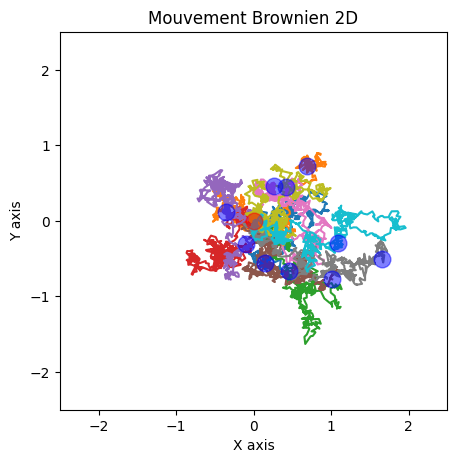

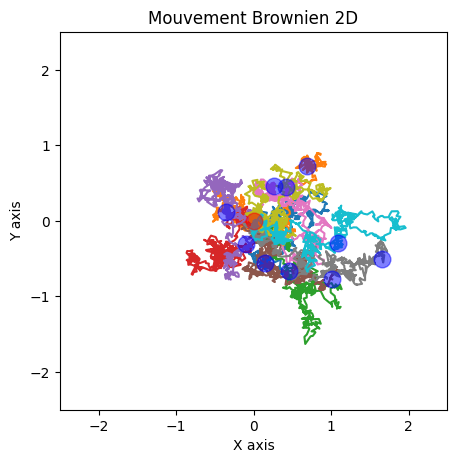

In [1]:
"""Brownian motion
code adapted from Scipy Cookbook https://scipy-cookbook.readthedocs.io/items/BrownianMotion.html
under an MIT-like license https://github.com/scipy/scipy-cookbook/blob/master/LICENSE.txt
"""
def brownian(x0, n, dt, delta, out=None):
    """
    Generate an instance of Brownian motion (i.e. the Wiener process):

        X(t) = X(0) + N(0, delta**2 * t; 0, t)

    where N(a,b; t0, t1) is a normally distributed random variable with mean a and
    variance b.  The parameters t0 and t1 make explicit the statistical
    independence of N on different time intervals; that is, if [t0, t1) and
    [t2, t3) are disjoint intervals, then N(a, b; t0, t1) and N(a, b; t2, t3)
    are independent.

    Written as an iteration scheme,

        X(t + dt) = X(t) + N(0, delta**2 * dt; t, t+dt)


    If `x0` is an array (or array-like), each value in `x0` is treated as
    an initial condition, and the value returned is a numpy array with one
    more dimension than `x0`.

    Arguments
    ---------
    x0 : float or numpy array (or something that can be converted to a numpy array
         using numpy.asarray(x0)).
        The initial condition(s) (i.e. position(s)) of the Brownian motion.
    n : int
        The number of steps to take.
    dt : float
        The time step.
    delta : float
        delta determines the "speed" of the Brownian motion.  The random variable
        of the position at time t, X(t), has a normal distribution whose mean is
        the position at time t=0 and whose variance is delta**2*t.
    out : numpy array or None
        If `out` is not None, it specifies the array in which to put the
        result.  If `out` is None, a new numpy array is created and returned.

    Returns
    -------
    A numpy array of floats with shape `x0.shape + (n,)`.

    Note that the initial value `x0` is not included in the returned array.
    """


    x0 = np.asarray(x0)

    # For each element of x0, generate a sample of n numbers from a
    # normal distribution.
    if len(delta)>1:
        r = np.empty(x0.shape + (n,))
        r[0, :] = norm.rvs(size=(n,), scale=delta[0] * sqrt(dt))
        r[1, :] = norm.rvs(size=(n,), scale=delta[1] * sqrt(dt))
        r[2, :] = norm.rvs(size=(n,), scale=delta[2] * sqrt(dt))
    else:
        r = norm.rvs(size=x0.shape + (n,), scale=delta[0] * sqrt(dt))

    # If `out` was not given, create an output array.
    if out is None:
        out = np.empty(r.shape)

    # This computes the Brownian motion by forming the cumulative sum of
    # the random samples.
    np.cumsum(r, axis=-1, out=out)

    # Add the initial condition.
    out += np.expand_dims(x0, axis=-1)

    return out

import numpy as np
from matplotlib import pyplot as plt
from math import sqrt
from scipy.stats import norm

# The Wiener process parameter.
delta = [0.25]
# Total time.
T = 10.0
# Number of steps.
N = 500
# Time step size
dt = T/N
# Initial values of x.
x = np.empty((2,N+1))
x[:, 0] = 0.0

fig = plt.figure(figsize=(5, 5), dpi=100)
ax = plt.axes()
n_samp = 10
points = np.empty((2, n_samp))
for samp in range(n_samp):
    brownian(x[:,0], N, dt, delta, out=x[:,1:])

    # Plot the 2D trajectory.
    ax.plot(x[0, :], x[1, :])
    points[:, samp] = x[:, -1]

# Mark the start and end points.
ax.plot(x[0,0], x[1,0], 'ro', markersize=12, alpha=0.5)
for samp in range(n_samp):
    ax.plot(points[0, samp], points[1, samp],'bo', markersize=12, alpha=0.5)

# More plot decorations.
plt.title('Mouvement Brownien 2D')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_xlim([-2.5, 2.5])
ax.set_ylim([-2.5, 2.5])

# Glue the figure
from myst_nb import glue
glue("brownian-fig", fig, display=False)

```{glue:figure} brownian-fig
:figwidth: 500px
:name: "brownian-fig"
Illustration de mouvement Brownien d'une molécule. Le point de départ est indiqué par un cercle rouge. Les trajectoires de couleurs correspondent à des marches aléatoires simulées suivant un mouvement Brownien. Les points bleus indiquent le point d'arrivée de chaque marche. Figure générée à l'aide de code Python par P. Bellec, sous licence [CC-BY 4.0](https://creativecommons.org/licenses/by/4.0/).  Le code de simulation de mouvement Brownien est adapté du [Scipy Cookbook](https://scipy-cookbook.readthedocs.io/items/BrownianMotion.html) sous une [licence](https://github.com/scipy/scipy-cookbook/blob/master/LICENSE.txt) proche de MIT.
```

### Diffusion isotrope et anisotrope

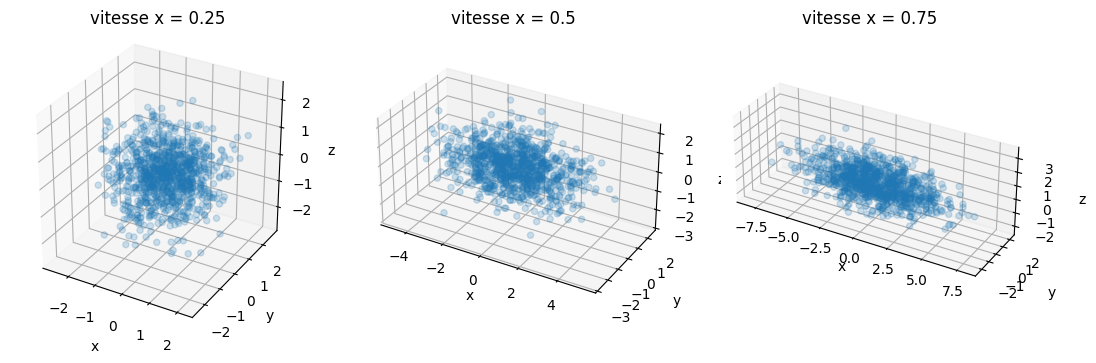

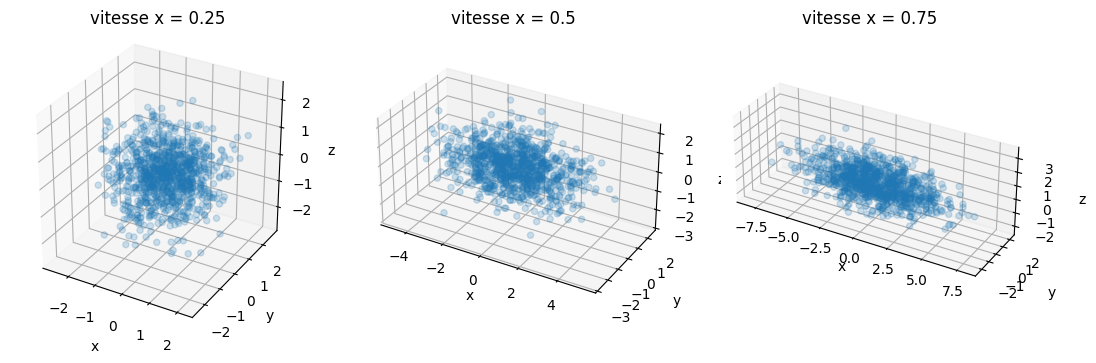

In [2]:
list_speed = (0.25, 0.5, 0.75)
# Initial values of x.
x = np.empty((3,N+1))
x[:, 0] = 0.0
fig = plt.figure(figsize=(13, 5), dpi=100)
for num, speed in enumerate(list_speed):
    fig.add_subplot(1, len(list_speed), num + 1, projection='3d')
    ax = plt.gca()
    n_samp = 1000
    delta=np.array([speed, 0.25, 0.25])
    bounds = [8, 8, 8]
    points = np.empty((3, n_samp))
    for samp in range(n_samp):
        brownian(x[:,0], N, dt, delta, out=x[:,1:])
        points[:, samp] = x[:, -1]
    ax.scatter(points[0, :], points[1, :], points[2, :], 'o', alpha=0.2)
    ax.set_box_aspect([ax.get_xlim()[1] - ax.get_xlim()[0],
                       ax.get_ylim()[1] - ax.get_ylim()[0],
                       ax.get_zlim()[1] - ax.get_zlim()[0]]
                    )
    ax.set_title(f'vitesse x = {speed}')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

# Glue the figure
from myst_nb import glue
glue("anisotropic-fig", fig, display=False)  

```{glue:figure} anisotropic-fig
:figwidth: 800px
:name: "anisotropic-fig"
Diffusion isotrope vs anisotrope. Chaque rond bleu représente le point d'arrivée d'une molécule d'eau selon une simulation de marche aléatoire avec un processus Brownien en 3D. Sur le graphe de gauche, la vitesse de diffusion des molécules d'eau est identique dans toutes les directions. Sur les graphes du milieu et de droite, la vitesse de diffusion est supérieure selon l'axe `x` que selon `y` et `z`. Figure générée à l'aide de code Python par P. Bellec, sous licence [CC-BY 4.0](https://creativecommons.org/licenses/by/4.0/).
```
Le déplacement des molécules d'eau dans un milieu suit un mouvement Brownien. Si le milieu a des caractéristiques similaires dans toutes les directions, on parle de milieu **isotrope**. Le graphe de gauche de la {numref}`anisotropic-fig` représente l'ensemble des points d'arrivée de marches aléatoire dans un tel milieu isotrope. On remarque que les molécules se répartissent approximativement dans une sphère. Que se passe-t-il si la diffusion est plus rapide dans une direction donnée, par exemple l'axe `x`? On parle alors de milieu **anisotropie**. Sur le graphe du milieu, on voit que la forme remplie par les molécules s'allongue, et ressemble plus à un ballon de football américain qu'à une sphère (ou, en termes mathématiques, une ellipse). Plus la différence de vitesse de diffusion sur `x` grandit par rapport aux directions `y` et `z`, et plus la forme s'allonge (graphe de droite).

### Diffusion et fibres de matière blanche
```{figure} irm_diffusion/dissection.png
---
width: 800px
name: dissection-fig
---
Dissection cérébrale illustrant l'organisation de la matière blanche cérébrale en faisceaux de fibre. Bas droite: schéma illustrant la diffusion de l'eau, contrainte par les fibres. Le point rouge correspond à l'origine de marches aléatoires, dont les terminaisons sont indiquées par les points bleus. Images de cerveau tirées de {cite:p}`Bakhit2020-yk`, sous licence CC-BY 4.0. Le reste de la figure par P Bellec, sous licence [CC-BY 4.0](https://creativecommons.org/licenses/by/4.0/), inspiré par la thèse de C. Poupon, 1999.
```
Les axones des neurones viennent contraindre la diffusion de l'eau, les molécules d'eau ne peuvent donc pas se déplacer librement dans toutes les directions. Le profil de diffusion des molécules d'eau suit alors une forme anisotrope, comme on vient de le voir en {numref}`anisotropic-fig`. L'eau diffuse plus facilement dans la direction parallèle aux fibres. La diffusion est donc anisotrope et le coefficient de diffusion sera alors plus élevé dans cette direction parallèle, voir {numref}`dissection-fig`.
Alors, en sachant comment diffuse l'eau, nous pouvons déterminer la configuration des axones. Le phénomène de diffusion dépend de la structure du tissu! C'est le principe physiologique à l'origine des mesures en IRMd.

### Acquisition IRMd

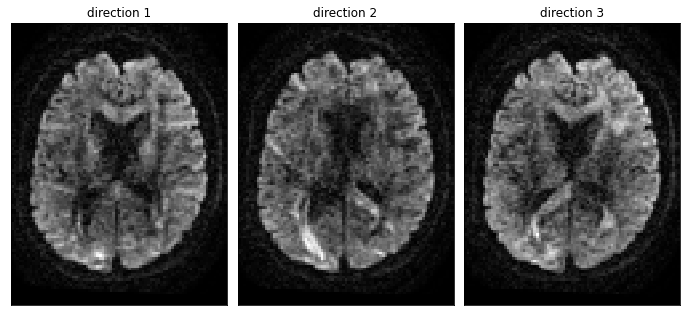

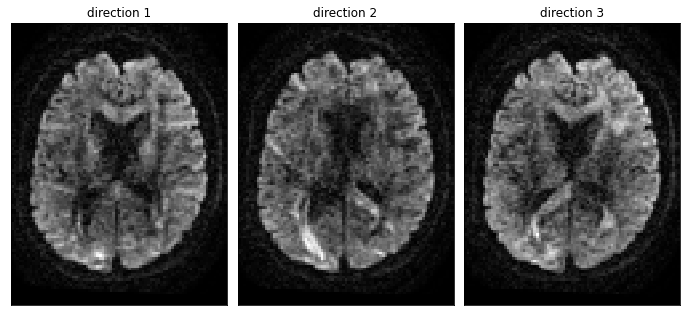

In [3]:
import numpy as np
from dipy.data import get_fnames
from dipy.io.image import load_nifti, save_nifti
import matplotlib.pyplot as plt

hardi_fname, hardi_bval_fname, hardi_bvec_fname = get_fnames('stanford_hardi')
data, affine = load_nifti(hardi_fname)

sli = data.shape[2] // 2
list_vol = [10, 40, 50]  # pick out random volumes and gradient directions

fig1, ax = plt.subplots(1, 3, figsize=(12, 6),
                        subplot_kw={'xticks': [], 'yticks': []})
fig1.subplots_adjust(hspace=0.3, wspace=0.05)

for num, vol in enumerate(list_vol):
    vol_slice = data[:, :, sli, vol]

    ax.flat[num].imshow(vol_slice.T, cmap='gray', interpolation='none',
                  origin='lower')
    ax.flat[num].set_title(f'direction {num+1}')
# Glue the figure
from myst_nb import glue
glue("diffusion-direction-fig", fig1, display=False)  

```{glue:figure} diffusion-direction-fig
:figwidth: 600px
:name: "diffusion-direction-fig"
Volumes IRM pondérées en diffusion. Chaque coupe axiale représente un volume T2* pondérée en diffusion pour une direction différente. Figure générée à l'aide de code Python par P. Bellec, sous licence [CC-BY 4.0](https://creativecommons.org/licenses/by/4.0/). Le code est adapté d'un [tutorial](https://dipy.org/documentation/1.4.1./examples_built/denoise_patch2self/#example-denoise-patch2self) de la librairie [Dipy](https://dipy.org/), distribuée sous licence [BSD 3-Clause](https://github.com/dipy/dipy/blob/master/LICENSE).
```
En IRM de diffusion, nous allons prendre des images selon plusieurs orientations. Ce sont des images pondérées en T2* que nous acquirons en IRMd. La séquence appliquée rend l'image sensible à la diffusion de l'eau, dans une direction donnée. Pour un voxel donnée, nous allons prendre des mesures dans différentes directions, qui vont nous dire si l'eau a beaucoup diffusée dans cette direction là, un peu comme les points bleus de la {numref}`dissection-fig`. Pour un volume IRMd, la valeur en un voxel nous dit si le point bleu est loin ou pas du point rouge, en moyenne pour une direction que l'on a sélectionné, voir {numref}`diffusion-direction-fig`

## Tenseur de diffusion

### Le modèle du tenseur

```{figure} irm_diffusion/tensor-schematic.png
---
width: 600px
name: tensor-schematic-fig
---
La diffusion des molécules d'eau au cours du temps peut se visualiser comme un nuage de points. À cause des contraintes de l'environnement, notamment les axones, ce nuage prend la forme d'un ballon de rugby (haut, gauche). La forme du nuage peut être approximée avec un modèle de tenseur (bas à gauche). Les paramètres principaux de ce modèle sont les directions principales de diffusion $e_1$, $e_2$, $e_3$, ainsi que les valeurs de diffusion associées à ces directions $\lambda_1 \geq \lambda_2 \geq \lambda_3$. Figure par P. Bellec sous licence [CC-BY 4.0](https://creativecommons.org/licenses/by/4.0/), inspirée par M. Descoteaux et C. Poupon,
```

À partir des simulations ci-dessus, il est intuitif d'imaginer la diffusion de l'eau comme un ballon, plus ou moins allongé. Mathématiquement, cela se formule avec un tenseur de diffusion, ou **modèle Gaussien**, voir {numref}`tensor-schematic-fig`. Pour estimer la forme de notre ballon dans chaque voxel, nous utilisons les différentes valeurs de diffusion obtenues pour chaque direction d'acquistion. Si la diffusion est plus grande selon une certaine direction, notre ballon ressemblera plutôt à un ballon de rugby. Si la diffusion est semblable dans toutes les directions d'acquisition, nous obtiendrons plutôt un ballon de soccer.

### Imagerie par tenseurs de diffusion

In [4]:
# Import des modules
import numpy as np
from dipy.io.image import load_nifti, save_nifti
from dipy.io.gradients import read_bvals_bvecs
from dipy.core.gradients import gradient_table
import dipy.reconst.dti as dti
from dipy.data import get_fnames

# Télécharge des données HARDI
hardi_fname, hardi_bval_fname, hardi_bvec_fname = get_fnames('stanford_hardi')
data, affine = load_nifti(hardi_fname)
bvals, bvecs = read_bvals_bvecs(hardi_bval_fname, hardi_bvec_fname)
gtab = gradient_table(bvals, bvecs)

# Masque les données et estime les tenseurs
from dipy.segment.mask import median_otsu
data = data[:, :, 28:29, :]
maskdata, mask = median_otsu(data, vol_idx=range(10, 50), median_radius=3,
                             numpass=1, autocrop=True, dilate=2)
tenmodel = dti.TensorModel(gtab)
tenfit = tenmodel.fit(maskdata)

# Génère métriques dérivées (FA etc)
from dipy.reconst.dti import fractional_anisotropy, color_fa
FA = fractional_anisotropy(tenfit.evals)
FA[np.isnan(FA)] = 0
FA = np.clip(FA, 0, 1)
RGB = color_fa(FA, tenfit.evecs)
MD1 = dti.mean_diffusivity(tenfit.evals)

# Figure
from dipy.data import get_sphere
sphere = get_sphere('repulsion724')
from dipy.viz import window, actor
scene = window.Scene()
# evals = tenfit.evals
# evecs = tenfit.evecs
# cfa = RGB
# # boost the colors
# cfa *= 2
# cfa[cfa > 1] = 1
# scene.set_camera(
#                  position=(-100, 60, 75),
#                  focal_point=(0, 0, -75),
#                  view_up=(0, 0, 1)
#                 )
# scene.add(actor.tensor_slicer(evals, evecs, scalar_colors=cfa, sphere=sphere,
#                               scale=0.3))
# window.record(scene, n_frames=1, out_path='irm_diffusion/tensor-slice.png',
#               size=(800, 800))

# Figure zoom
# scene.clear()
evals = tenfit.evals[16:26, 54:64, :]
evecs = tenfit.evecs[16:26, 54:64, :]

# boost the colors
RGB *= 2
RGB[RGB>1] = 1
cfa = RGB[16:26, 54:64, :]
scene.set_camera(position=(-176.42, 118.52, 150),
                 focal_point=(0, 0, 75),
                 view_up=(0, 0, 1))
scene.add(actor.tensor_slicer(evals, evecs, scalar_colors=cfa, sphere=sphere,
                              scale=0.3))

print('Saving illustration as tensor_ellipsoids.png')
window.record(scene, n_frames=1, out_path='irm_diffusion/tensor-zoom.png',
              size=(600, 600))

Saving illustration as tensor_ellipsoids.png


```{figure} irm_diffusion/tensor-zoom.png
---
width: 600px
name: tensor-zoom-fig
---
Tenseurs de diffusion estimés sur une grille régulière de voxels. Zoom sur une portion de coupe axiale. La couleur de chaque tenseur code pour la direction principale de diffusion, ainsi que l'anisotropie franctionnelle de chaque tenseur. Les tenseurs les plus brillants sont fortement anisotropes, c'est à dire que la direction principale de diffusion est nettement plus forte que les directions transverses. Figure généré par du code python adapté d'un [tutoriel Dipy](https://dipy.org/documentation/1.4.1./examples_built/reconst_dti/#example-reconst-dti) par P. Bellec sous licence [CC-BY 4.0](https://creativecommons.org/licenses/by/4.0/).
```

L'imagerie par tenseurs de diffusion (*diffusion tensor imaging*, DTI) est l'une des premières techniques d'analyse qui a vu le jour en IRM de diffusion. Pour estimer la forme de notre ballon, nous avons besoin d'au moins six directions d'acquisition: `xy`, `xz`, `yz`, `-xy`, `-xz`, `y-z`. C'est en combinant les images dans ces six directions que nous pouvons estimer notre tenseur de diffusion (notre ballon). Comme on a ces mesures pour chacun des voxels, on peut créer un volume cérébral où la valeur de chaque voxel est un tenseur (ballon), voir {numref}`tensor-zoom-fig`.

### Caractéristiques des tenseurs

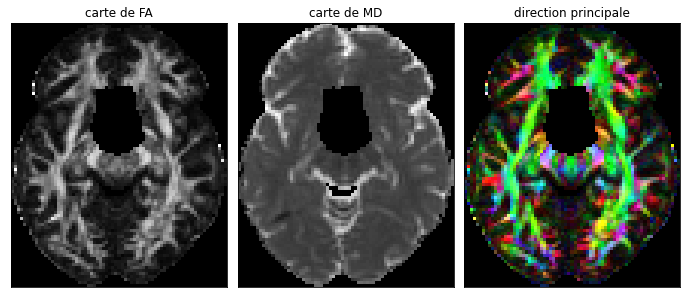

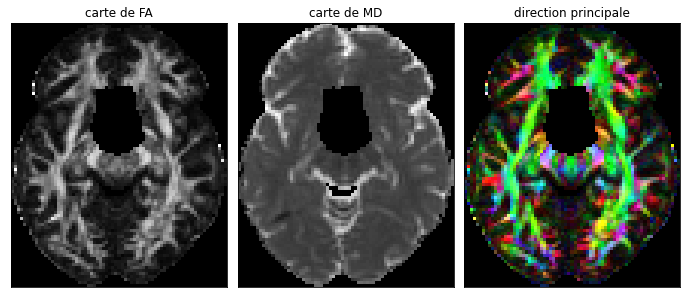

In [5]:
import matplotlib.pyplot as plt
RGB2 = np.empty([RGB.shape[1], RGB.shape[0], RGB.shape[3]])
MD = MD1
MD[mask==0] = 0

for num in range(3):
    RGB2[:, :, num] = np.squeeze(RGB[:, :, :, num]).T

fig1, ax = plt.subplots(1, 3, figsize=(12, 6),
                        subplot_kw={'xticks': [], 'yticks': []})

fig1.subplots_adjust(hspace=0.3, wspace=0.05)
ax.flat[0].imshow(np.squeeze(FA).T, origin='lower',
                  cmap='gray', vmin=0, vmax=1)
ax.flat[0].set_title('carte de FA')
ax.flat[1].imshow(np.squeeze(MD).T, origin='lower',
                  cmap='gray')
ax.flat[1].set_title('carte de MD')
ax.flat[2].imshow(RGB2, origin='lower')
ax.flat[2].set_title('direction principale')

# Glue the figure
from myst_nb import glue
glue("fa-md-rgb-fig", fig1, display=False)

```{glue:figure} fa-md-rgb-fig
:figwidth: 800px
:name: "fa-md-rgb-fig"
 Cartes dérivées de tenseurs en IRM de diffusion: anisotropie fractionnelle (gauche), diffusivité moyenne (milieu) et direction principale du tenseur (droite). Pour la direction principale, l'axe médial-latérale (`x`) est codé en rouge, l'axe antérieur-postérieur (`y`) est codée en vert, et l'axe ventral-dorsal (`z`) est codée en bleu. Figure générée à l'aide de code Python adapté d'un [tutoriel Dipy](https://dipy.org/documentation/1.4.1./examples_built/reconst_fwdti/#example-reconst-fwdti) par P. Bellec, sous licence [CC-BY 4.0](https://creativecommons.org/licenses/by/4.0/).
```
Il est possible de résumer certaines caractéristiques importantes des tenseurs de diffusion à l'aide d'une unique mesure, comme l'anisotropie fractionnelle et la diffusivité moyenne (voir définitions ci dessous). On extrait donc une mesure par voxel, ce qui peut se représenter avec une carte cérébrale, de manière similaire à ce que l'on a vu avec les images pondérées en T1 ou en T2, voir {numref}`fa-md-rgb-fig`. Il est aussi possible de créer une image en couleurs, qui code pour la direction principale de diffusion.

```{admonition} Anisotropie fractionnelle
Une mesure populaire est l'[anisotropie fractionnelle](https://en.wikipedia.org/wiki/Fractional_anisotropy) (FA en anglais), qui permet de mesurer le degré d'anisotropie d'un phénomène de diffusion, en prenant des valeurs entre 0 et 1. Une valeur d'anisotropie fractionnelle de 0 indique une diffusion isotropique (ballon de soccer), alors qu'une valeur de 1 indique une diffusion fortement anisotropie (ballon de rugby). À noter que l'anisotropie fractionnelle de l'eau est 0, à moins que la diffusion soit contrainte par une structure. Les valeurs fortes de FA se retrouvent généralement dans la matière blanche.
```
```{admonition} Diffusivité moyenne
Nous pouvons aussi mesurer la **diffusivité moyenne** selon l'équation suivante (voir {numref}`tensor-schematic-fig` pour les notations):
$\overline{\lambda} = \frac{\lambda_{1}+\lambda_{2}+\lambda_{3}}{3}$
La diffusivité moyenne nous indique à quel point il y a de la diffusion à l'intérieur d'un voxel. La diffusivité moyenne est très forte dans le liquide céphalo-rachidien, où les molécules d'eau sont très peu contraintes.
```

```{admonition} Direction principale de diffusion
Afin de visualiser dans quelle direction principale pointe les tenseurs, une approche populaire consiste à coder chaque axe `x`, `y` et `z` avec une couleur (rouge, vert, bleu, respectivement). Pour une direction donnée, on mélange les trois couleurs dans une proportion correspondant aux contributions des trois axes.
```

## Tractographie

La [tractographie](https://fr.wikipedia.org/wiki/Tractographie) permet de tracer le chemin des fibres de matière blanche in vivo. Il existe plusieurs approches de tractographie. Nous allons aborder la **tractographie *Streamline* déterministe** et la **tractographie probabiliste**.

### Tractographie streamline déterministe

La tractographie *streamline* déterministe permet de reconstruire les fibres de matière blanche en partant d'un point donné dans la matière grise et en se déplaçant de manière itérative selon la direction principale de diffusion. Le chemin va se terminer lorsque nous arrivons dans la matière grise. Ce chemin va être tracé grâce à un logiciel.

Que se passe-t-il s'il existe plusieurs direction à un point donné sur notre tracé ? Dans ce cas, l'algorithme choisira la direction qui est la plus alignée avec le point d'arrêt.

### Tractographie probabiliste

La tractographie probabilitste est similaire à la tractographie déterministe, mais considère en plus une incertitude sur la direction des fibres de matière blanche.

```{admonition} Tractes
À partir des algorithmes de tractographie nous pouvons produire des tractes, c'est-à-dire des courbes en 3D. Ces tractes connectent deux voxels. Nous appelons l'ensemble des tractes *tractogramme*.
```

### A priori sur l'organisation des fibres

Nous pouvons fournir aux algorithmes de tractographie des a priori sur les fibres dans le cerveau que nous connaissons. Dans une **reconstruction systématique** des fibres, tout va être tracé, alors que dans une **dissection virtuelle**, que certains paquets de fibres vont être tracés.

## Croisement de fibres

Une limitation que nous rencontrons avec l'imagerie en tenseur de diffusion est le croisement de fibres. Lorsqu'il y a beaucoup de fibres qui se croisent comme dans la figure ci-dessous, les fibres vont s'annuler...

[Insérer image croisement de fibres]

Une des technique utilisée pour résoudre ce problème est l'**imagerie de diffusion à haute résolution**, qui nous permet d'estimer les tenseurs. Cette technique consiste à effectuer l'acquisition des données sur encore plus de directions (une trentaine à une soixantainne de directions) en utilisant une **séquence HARDI** (*High Angular Resolution Diffusion Imaging*). Les acquisitions réalisées avec cette séquence sont plus longues que celles en DTI, 5-30 min vs 3-4 min.

Avec la séquence HARDI, nous pouvons estimer une fonction de distribution des orientations (*Orientation Distribution Function*, ODF) de diffusion lorsqu'il y a des croisements de fibres perpendiculaires. Ceci nous permet d'estimer plusieurs tenseurs à l'intérieur d'un voxel et de surpasser certaines limites du tenseur de diffusion (DTI).

```{admonition} Fonction de distribution des orientations (ODF) vs fonction de distribution des orientation de fibres (fODF)
La fonction de distribution des orientations de diffusion correspond à la probabilité de diffusion de l'eau dans les tissus dans un voxel. La fonction de distribution des orientations des fibres correspond à la probabilité qu'une fibre soit présente pour chaque orientation localement.
```

[Insérer images ODF]

```{warning} ODF et angle entre les fibres
L'ODF de diffusion n'est pas complètement robuste aux croisements de fibres. En effet, plus l'angle de croisement entre les fibres est petit, plus l'ODF de diffusion sera limité dans la détection de ces croisements.
```

Nous pouvons calculer les fODF (*fibers ODF*) à partir de l'ODF. Les pics fODF peuvent être observés dans les différents tissus grâce à des logiciels. Dans les ventricules nous observons plusieurs directions, comme des petits ballons dans chaque voxel, alors que nous observons une direction principal dans le corps calleux, par exemple.

### Évaluation sur un fantôme

Nous pouvons évaluer l'adéquation de nos modèles grâce à un fantôme. Nous pouvons schématiser plusieurs cas de configuration de fibres (voir figure XX) pour ensuite regarder comment performe différents algorithmes.

[Insérer figure avec les différents croisements de fibre et fibres en U]

Nous pouvons avoir confiance qu'un algorithme qui performe bien sur un fantôme performera également bien sur un vrai cerveau !

## Analyses statistique
### Modèle linéaire de groupe

Nous pouvons effectuer un **modèle linéaire de groupe** sur les cartes de FA, similairement à ce que nous avons vu pour l'IRM structurelle et fonctionnelle. Par contre, en IRM de diffusion, nous allons effectuer un recalage au niveau des fibres de matière blanche puisque c'est ce qui nous intéresse, et non au niveau du cerveau en entier. Si nous nous intéressons particulièrement au corps calleux, il est important que cette structure soit alignée à travers les individus pour étudier l'anisotropie fractionnelle dans cette structure.


### Étapes préalables

Quelques étapes sont nécessaires avant d'effectuer le profil de d'anisotropie fractionnelle (FA).

1. Reconstruction des fibres
2. Nettoyage des fibres:
3. Extraction des centroïdes
4. Segmentation en différentes régions

[Insérer figure avec les différentes étapes]

### Profil de FA

Pour avoir des valeurs précises le long des fibres, nous allons calculer les carte de FA, tel que discuté précédemment. En pratique, nous pouvons par exemple comparer les profils de FA entre différentes populations le long de différents faisceaux.

## Applications

Maintenant que nous avons vu plusieurs principles de l'IRM de diffusion et différentes approches d'analyse, voyons ses applications possibles.

- Maladies neurodégénératives: nous pouvons étudier l'impact du vieillissement et des démences sur l'intégrité de la matière blanche grâce à l'IRM de diffusion.

- Développement du cerveau: nous pouvons étudier le développement de la matière blanche dans les différentes régions du cerveau au cours du développement de l'enfant. En effet, la matière blanche se développe à différents rythmes selon les différentes régions du cerveau.

- Planification de chirurgie: il est important de savoir comment sont organisés les fibres de matière blanche avant une chirurgie, par exemple avant de retirer une tumeur cérébrale pour ne pas endommager les fibres qui ne sont pas touchées par la tumeur.

- Découvertes anatomiques dans la matière blanche: l'IRM de diffusion nous permet d'obtenir des informations supplémentaires à des études de dissection. En IRM de diffusion, les algorithmes utilisés permettent de découvrir des chemins de matière blanche qui ne seraient potentiellement pas visible à l'oeil.

- Comprendre les liens entre les structures et les fonctions du cerveau: nous pouvons examiner les liens structurels entre différentes régions qui sont fonctionnellement reliées.

- Traumatismes crâniens et accidents vasculaires cérébraux: nous qualifions souvent les traumatismes crâniens comme étant une maladie de la matière blanche, puisqu'ils entrainent des altérations de la microstructure de matière blanche. Nous pouvons également observer des altérations de la microstructure suite à des accidents vasculaires cérébraux.

## Conclusion

Dans ce cours, nous avons vu les principes de l'IRM de diffusion. Plus précisément, nous avons vu:
- Comment obtenir des images en IRMd grâce à la diffusion de l'eau dans différentes directions
- Comment estimer le processus de diffusion à l'aide de tenseurs et d'en mesurer différentes métriques (diffusivité moyenne, FA)
- Comment estimer les croisements de fibres
- Quelques méthodes d'analyse que nous pouvons effectuer en IRMd

## Références
```{bibliography}
:filter: docname in docnames
```

## Exercices

```{admonition} Exercice 6.1
:class: note
Des données d’IRM de diffusion sont… (vrai/faux, expliquez vos réponses)
 1. Une image avec un tenseur à chaque voxel.
 2. Une image avec un ou plusieurs tenseurs à chaque voxel.
 3. Une série d’images sensibles à la diffusion de l’eau dans différentes directions.
 4. Des images où l’on voit les fibres de matière blanche du cerveau en 3D.
 5. L’équivalent moderne d’une dissection cérébrale, mais non invasif.
```

```{admonition} Exercice 6.2
:class: note
Est-ce qu’il est possible d’avoir… (si oui, donnez un exemple, si non, expliquez pourquoi):
 1. Une faible anisotropie fractionnelle, avec une forte diffusivité moyenne?
 2. Une faible diffusivité moyenne, avec une forte anisotropie fractionnelle?
 3. Une forte anisotropie fractionnelle, avec une forte diffusivité moyenne?
 4. Une faible anisotropie fractionnelle, avec une faible diffusivité moyenne?
```

```{admonition} Exercice 6.3
:class: note
On observe un voxel dont l’anisotropie fractionnelle est basse. Donnez deux interprétations de cette observation.
```

```{admonition} Exercice 6.4
:class: note
Citez trois exemples de faisceaux de fibres.
```

```{admonition} Exercice 6.5
:class: note
Citez deux exemples de problèmes qui peuvent faire échouer un processus de tractographie “streamline” déterministe.
```

```{admonition} Exercice 6.6
:class: note
Quel est l’avantage de réaliser des statistiques du groupe sur un faisceau de fibres, plutôt que voxel par voxel avec un recalage anatomique traditionnel, comme en IRMf?
```